In [1]:
import os
import json
import csv
import pathlib

In [11]:
for i in range(len(os.listdir("./Test Result/"))//2):
    file1 = file_path[i*2]
    file2 = file_path[i*2+1]
    output_file = os.path.join("./ToBeAnalyzed1/", file1.split("/")[2].replace("_false", ""))
    with open(output_file, "w") as fout:
        for fname in [file1, file2]:
            with open(fname, "r") as fin:
                for line in fin:
                    fout.write(line)

In [2]:
file_list = os.listdir("./ToBeAnalyzed1/")

for i in range(len(file_list)):
    file_list[i] = os.path.join("./ToBeAnalyzed1/", file_list[i])

print(file_list)

['./ToBeAnalyzed1/Clothing_Shoes_and_Jewelry.jsonl', './ToBeAnalyzed1/Electronics.jsonl', './ToBeAnalyzed1/Health_and_Personal_Care.jsonl']


In [3]:
output_dir = "./ToBeAnalyzed2/"
os.makedirs(output_dir, exist_ok=True)

fieldnames = [
    "rating",
    "text_word_length",
    "helpful_vote",
    "verified_purchase",
    "predict_stars",
    "asin",
    "parent_asin",
    "user_id",
    "timestamp",
    "title",
    "text"
]

for file_path in file_list:
    if not file_path.endswith(".jsonl"):
        continue

    file_name = os.path.basename(file_path)
    csv_name = file_name.replace('.jsonl', '.csv')
    output_path = os.path.join(output_dir, csv_name)

    rows = []

    with open(file_path, 'r', encoding='utf-8') as f:
        for line in f:
            try:
                data = json.loads(line)
                row = {
                    "rating": int(data.get("rating", None)),
                    "text_word_length": len(data.get("text", "").split()),
                    "helpful_vote": data.get("helpful_vote", 0),
                    "verified_purchase": int(data.get("verified_purchase", False)),
                    "predict_stars": data.get("predict_stars", None),
                    "asin": data.get("asin", ""),
                    "parent_asin": data.get("parent_asin", ""),
                    "user_id": data.get("user_id", ""),
                    "timestamp": data.get("timestamp", None),
                    "title": data.get("title", ""),
                    "text": data.get("text", "")
                }
                rows.append(row)
            except json.JSONDecodeError:
                print(f"[Skip] JSON lines that cannot be parsed:{file_path}")
            except Exception as e:
                print(f"[Error] File {file_path} Processing error: {e}")

    with open(output_path, 'w', newline='', encoding='utf-8') as f_out:
        writer = csv.DictWriter(f_out, fieldnames=fieldnames)
        writer.writeheader()
        writer.writerows(rows)

    print(f"Processing complete: {file_path} → {output_path} (total {len(rows)} records)")

Processing complete: ./ToBeAnalyzed1/Clothing_Shoes_and_Jewelry.jsonl → ./ToBeAnalyzed2/Clothing_Shoes_and_Jewelry.csv (total 500000 records)
Processing complete: ./ToBeAnalyzed1/Electronics.jsonl → ./ToBeAnalyzed2/Electronics.csv (total 500000 records)
Processing complete: ./ToBeAnalyzed1/Health_and_Personal_Care.jsonl → ./ToBeAnalyzed2/Health_and_Personal_Care.csv (total 494121 records)


Preview of the dataset:
   rating  text_word_length  helpful_vote  verified_purchase  predict_stars  \
0       5               123             2                  0              4   
1       5                76             2                  0              4   
2       4                29             0                  0              4   
3       5                73             0                  0              4   
4       5               123             0                  0              4   

         asin parent_asin                       user_id      timestamp  \
0  B07HKN6MKT  B07HKFG85D  AFQQQ5LGNSQUEBGDCYBAZZE5T3DA  1572717611106   
1  B07R2M9493  B08PFVF5L8  AFQQQ5LGNSQUEBGDCYBAZZE5T3DA  1578963669172   
2  B095HVX3Y2  B095HVX3Y2  AG7JSIKUQPSL5AAPRDRKDNWM4U2A  1676298981621   
3  B08LYQ7MBZ  B08LYQ7MBZ  AFSKPY37N3C43SOI5IEXEK5JSIYA  1608657775229   
4  B0781Z7Y3S  B08KG14KCT  AHV6QCNBJNSGLATP56JAWJ3C4G2A  1518902978318   

                           title  \
0               Very

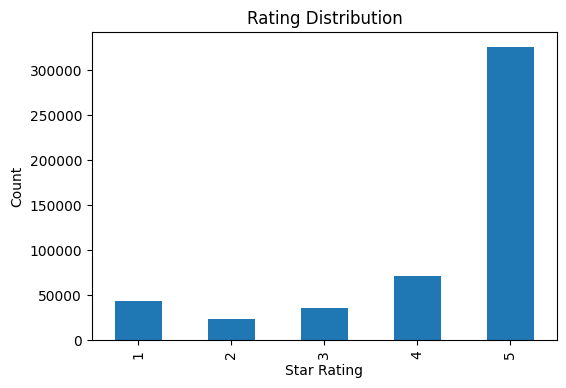

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("ToBeAnalyzed2/Electronics.csv", encoding="utf-8-sig")

# View the first few rows
print("Preview of the dataset:")
print(df.head())

# Basic statistics for numerical fields
print("\nSummary statistics:")
print(df.describe())

# Check for missing values
print("\nMissing values per column:")
print(df.isnull().sum())

# Distribution of user-assigned ratings
print("\nDistribution of star ratings:")
print(df['rating'].value_counts().sort_index())

# Calculate and display the difference between actual and predicted rating
df['rating_gap'] = df['rating'] - df['predict_stars']
print("\nDistribution of rating-prediction differences:")
print(df['rating_gap'].value_counts())

# Visualize the rating distribution
plt.figure(figsize=(6,4))
df['rating'].value_counts().sort_index().plot(kind='bar', title='Rating Distribution')
plt.xlabel("Star Rating")
plt.ylabel("Count")
plt.show()
